<a href="https://colab.research.google.com/github/jasneetchahal/ENEL-645-group-8/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries

In [2]:
import sklearn
import matplotlib.pyplot as plt
import time
import cv2
from scipy import ndimage, misc
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
!pip install ipynb
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=ec590802e2df76007711caff9852d1aacdb87df0f241a2bbec74d85018dc6e25
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [4]:
!pip install kora -q
from kora import drive
drive.link_nbs()

     |████████████████████████████████| 57 kB 6.4 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
Mounted at /content/drive


In [5]:
import SiameseModel
import logging
from tensorflow.keras.callbacks import TensorBoard
from PIL import Image
import numpy as np
import time
import os
import sys
from SiameseModel import Recognizer
import logging
import tensorflow as tf
from tensorflow.keras import models

importing Jupyter notebook from /nbs/SiameseModel.ipynb


### Image Dimensions

In [6]:
data_dimension = 128

### Input and target vectors

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
# Loading input and target vectors

X1 = np.load('/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Output/x1.npy')
X2 = np.load('/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Output/x2.npy')
Y = np.load('/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Output/y.npy')


X1 = X1.reshape( ( X1.shape[0]  , data_dimension**2 * 3  ) ).astype( np.float32 )
X2 = X2.reshape( ( X2.shape[0]  , data_dimension**2 * 3  ) ).astype( np.float32 )

print( X1.shape )
print( X2.shape )
print( Y.shape )

(5184, 49152)
(5184, 49152)
(5184,)


In [9]:
# Training and Validation Data Set
random_numbers = np.random.rand(5184, 5)
indices = np.random.permutation(random_numbers.shape[0])
training_idx, test_idx = indices[:4000], indices[4000:]

X1_train = X1[training_idx,:]
X1_val = X1[test_idx,:]
X2_train = X2[training_idx,:]
X2_val = X2[test_idx,:]
y_train =  Y[training_idx]
y_val = Y[test_idx]

In [10]:

print("The shape of first training array is ", X1_train.shape)
print("The shape of second training array is ", X2_train.shape)
print("The shape of first validation array is ", X1_val.shape)
print("The shape of second validation array is ", X2_val.shape)
print("The shape of training labels are ", y_train.shape)
print("The shape of validation labels are ", y_val.shape)

The shape of first training array is  (4000, 49152)
The shape of second training array is  (4000, 49152)
The shape of first validation array is  (1184, 49152)
The shape of second validation array is  (1184, 49152)
The shape of training labels are  (4000,)
The shape of validation labels are  (1184,)


### Training and saving the model

In [11]:
# Creating an instance of siamese model
recognizer = Recognizer()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
model_name = 'model.h5'

In [13]:
# from tensorflow.keras.callbacks import EarlyStopping

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode = 'min')
monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')

In [14]:
# Defining hyper parameters
parameters = {
    'batch_size' : 7 ,
    'epochs' : 100 ,
    'callbacks' : [early_stop, monitor],
    'val_data' : ([X1_val, X2_val], y_val),
    'verbose' : 1
}

# Training the siamese model
recognizer.fit( [ X1_train , X2_train ], y_train, hyperparameters = parameters)       

Epoch 1/100
56/56 [==============================] - 41s 491ms/step - loss: 0.3328 - val_loss: 0.2392
Epoch 2/100
56/56 [==============================] - 24s 429ms/step - loss: 0.2284 - val_loss: 0.2053
Epoch 3/100
56/56 [==============================] - 24s 436ms/step - loss: 0.2039 - val_loss: 0.1921
Epoch 4/100
56/56 [==============================] - 25s 440ms/step - loss: 0.1942 - val_loss: 0.1866
Epoch 5/100
56/56 [==============================] - 25s 446ms/step - loss: 0.1898 - val_loss: 0.1824
Epoch 6/100
56/56 [==============================] - 25s 450ms/step - loss: 0.1860 - val_loss: 0.1795
Epoch 7/100
56/56 [==============================] - 26s 456ms/step - loss: 0.1814 - val_loss: 0.1712
Epoch 8/100
56/56 [==============================] - 26s 459ms/step - loss: 0.1751 - val_loss: 0.1672
Epoch 9/100
56/56 [==============================] - 26s 457ms/step - loss: 0.1699 - val_loss: 0.1634
Epoch 10/100
56/56 [==============================] - 26s 458ms/step - loss: 0.165

In [15]:
# saving the model
recognizer.save_model(model_name)

### Loading images from directory

In [16]:

dir_path_custom_images = "/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Test_DataSet/"
print(dir_path_custom_images)
dir_path_class1_images = "/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Augmented_dataSet/Ahmad/"
dir_path_class2_images = "/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Augmented_dataSet/Ammaar/"
dir_path_class3_images = "/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Augmented_dataSet/Jasneet/"
dir_path_class4_images = "/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Augmented_dataSet/Lakshmi/"
dir_path_class5_images = "/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Augmented_dataSet/Parth/"
dir_path_class6_images="/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Augmented_dataSet/Ramneek/"
    

/content/gdrive/MyDrive/ENEL645_project/Python_Project_images/Test_DataSet/


In [17]:
# storing the numpy arrays of all images
custom_images, list_true_labels = recognizer.prepare_images_from_dir_classes( dir_path_custom_images  )
class_1_images = recognizer.prepare_images_from_dir( dir_path_class1_images )
class_2_images = recognizer.prepare_images_from_dir( dir_path_class2_images )
class_3_images = recognizer.prepare_images_from_dir( dir_path_class3_images )
class_4_images = recognizer.prepare_images_from_dir( dir_path_class4_images )
class_5_images = recognizer.prepare_images_from_dir( dir_path_class5_images )
class_6_images = recognizer.prepare_images_from_dir( dir_path_class6_images )

In [18]:
# printing shape of all the images
print("The shape of the numpy array of class first images", class_1_images.shape)
print("The shape of the numpy array of class second images", class_2_images.shape)
print("The shape of the numpy array of class third images", class_3_images.shape)
print("The shape of the numpy array of class fourth images", class_4_images.shape)
print("The shape of the numpy array of class fifth images", class_5_images.shape)
print("The shape of the numpy array of class fifth images", class_6_images.shape)
print("The shape of the numpy array of custom images", custom_images.shape)

The shape of the numpy array of class first images (12, 49152)
The shape of the numpy array of class second images (12, 49152)
The shape of the numpy array of class third images (12, 49152)
The shape of the numpy array of class fourth images (12, 49152)
The shape of the numpy array of class fifth images (12, 49152)
The shape of the numpy array of class fifth images (12, 49152)
The shape of the numpy array of custom images (36, 49152)


### Classifying images

In [19]:
# Loading the best model

recognizer_best = models.load_model("model.h5", custom_objects={'LeakyReLU': tf.keras.layers.LeakyReLU})

In [20]:
# Predicting the score for each image

# scores stores a list of scores for each custom image with the train dataset
scores = list()

# labels is a list of labels for each custom image against the class label of trained image
labels = list()

# looping through all custom images
for image in custom_images:
    label = list()
    score = list()
    # looping across images of class 1
    for sample in class_1_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 0 to this class
        label.append( 0 )
    # looping across images of class 2
    for sample in class_2_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 1 for this class
        label.append( 1 )
    # looping across images of class 3
    for sample in class_3_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 2 for this class
        label.append( 2 )
    # looping across images of class 4
    for sample in class_4_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 3 for this class
        label.append( 3 )
    # looping across images of class 5
    for sample in class_5_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 4 for this class
        label.append( 4 )
        # looping across images of class 6
    for sample in class_6_images :
        image , sample = image.reshape( ( 1 , -1 ) ) , sample.reshape((1 , -1 ) )
        score.append( recognizer_best.predict( [ image , sample ])[0] )
        # appending label 5 for this class
        label.append( 5 )
    labels.append( label )
    scores.append( score )

### Analysing the scores and labels

In [21]:
scores = np.array( scores )
labels = np.array( labels )

### Classifying into classes based on best score

In [22]:
predicted_label_list = list()
for i in range( custom_images.shape[0] ) :
    index = np.argmax( scores[i] )
    label_ = labels[i][index]
    predicted_label_list.append(label_)
    print('IMAGE {} is {} with confidence of {}'.format( list_true_labels[i]  , label_ , scores[i][index][0]))

IMAGE 5 is 1 with confidence of 0.2508563697338104
IMAGE 5 is 3 with confidence of 0.9203009009361267
IMAGE 5 is 5 with confidence of 0.8605433106422424
IMAGE 5 is 2 with confidence of 0.34786778688430786
IMAGE 5 is 2 with confidence of 0.776971161365509
IMAGE 5 is 2 with confidence of 0.8814347386360168
IMAGE 4 is 3 with confidence of 0.6120381355285645
IMAGE 4 is 3 with confidence of 0.9455202221870422
IMAGE 4 is 4 with confidence of 0.542770266532898
IMAGE 4 is 4 with confidence of 0.937578022480011
IMAGE 4 is 3 with confidence of 0.7609069347381592
IMAGE 4 is 4 with confidence of 0.8488909602165222
IMAGE 3 is 0 with confidence of 0.2718435227870941
IMAGE 3 is 0 with confidence of 0.34591159224510193
IMAGE 3 is 3 with confidence of 0.868130624294281
IMAGE 3 is 3 with confidence of 0.9010767340660095
IMAGE 3 is 5 with confidence of 0.45263078808784485
IMAGE 3 is 3 with confidence of 0.3800944983959198
IMAGE 2 is 2 with confidence of 0.49752742052078247
IMAGE 2 is 5 with confidence of

# Confusion Matrix

In [23]:
#importing confusion matrix
#from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(list_true_labels, predicted_label_list)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(list_true_labels, predicted_label_list)))

print('Micro Precision: {:.2f}'.format(precision_score(list_true_labels, predicted_label_list, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(list_true_labels, predicted_label_list, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(list_true_labels, predicted_label_list, average='micro')))

Confusion Matrix

[[1 0 5 0 0 0]
 [0 4 1 0 0 1]
 [0 0 5 0 0 1]
 [2 0 0 3 0 1]
 [0 0 0 3 3 0]
 [0 1 3 1 0 1]]

Accuracy: 0.47

Micro Precision: 0.47
Micro Recall: 0.47
Micro F1-score: 0.47



# Classification Report

In [24]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(list_true_labels, predicted_label_list, target_names=['Ahmad', 'Ammaar', 'Jasneet','Lakshmi', 'Parth', 'Ramneek']))


Classification Report

              precision    recall  f1-score   support

       Ahmad       0.33      0.17      0.22         6
      Ammaar       0.80      0.67      0.73         6
     Jasneet       0.36      0.83      0.50         6
     Lakshmi       0.43      0.50      0.46         6
       Parth       1.00      0.50      0.67         6
     Ramneek       0.25      0.17      0.20         6

    accuracy                           0.47        36
   macro avg       0.53      0.47      0.46        36
weighted avg       0.53      0.47      0.46        36



# Comparison of images

In [25]:
# Getting a list of all the custom images
images_names = os.listdir( dir_path_custom_images )

list_custom_images = list()
for imageName in images_names :
  image = Image.open(dir_path_custom_images + imageName)
  list_custom_images.append(image)

In [26]:
# Getting a list of predicted images
list_similar_predict_image = list()
for i in range( custom_images.shape[0] ) :
    index = np.argmax( scores[i] )
    index_class_label = index % 20
    index_class = index//20 
    if index_class == 0:
      images_names_dir_org =  dir_path_class1_images
    elif index_class == 1:
      images_names_dir_org = dir_path_class2_images 
    elif index_class == 2:
      images_names_dir_org = dir_path_class3_images 
    elif index_class == 3:
      images_names_dir_org =  dir_path_class4_images 
    elif index_class == 4:
      images_names_dir_org = dir_path_class5_images
    elif index_class == 5:
      images_names_dir_org = dir_path_class6_images
    images_names = os.listdir( images_names_dir_org )
    j = 0
    for imageName in images_names :
      if j == index_class_label:
        image = Image.open(images_names_dir_org + imageName)
        list_similar_predict_image.append(image)
        break
      j = j+1

In [27]:
# Verifying the number of both the images
print('Total custom images are ', len(list_custom_images))
print('Total predicted images are ', len(list_similar_predict_image))

Total custom images are  36
Total predicted images are  29


In [28]:
# Reshaping all images
for i in range (len(list_similar_predict_image)):
  print(len(list_custom_images))
  list_custom_images[i] = list_custom_images[i].resize((200, 200))
  list_similar_predict_image[i] = list_similar_predict_image[i].resize((200, 200))
  print(i)

36
0
36
1
36
2
36
3
36
4
36
5
36
6
36
7
36
8
36
9
36
10
36
11
36
12
36
13
36
14
36
15
36
16
36
17
36
18
36
19
36
20
36
21
36
22
36
23
36
24
36
25
36
26
36
27
36
28


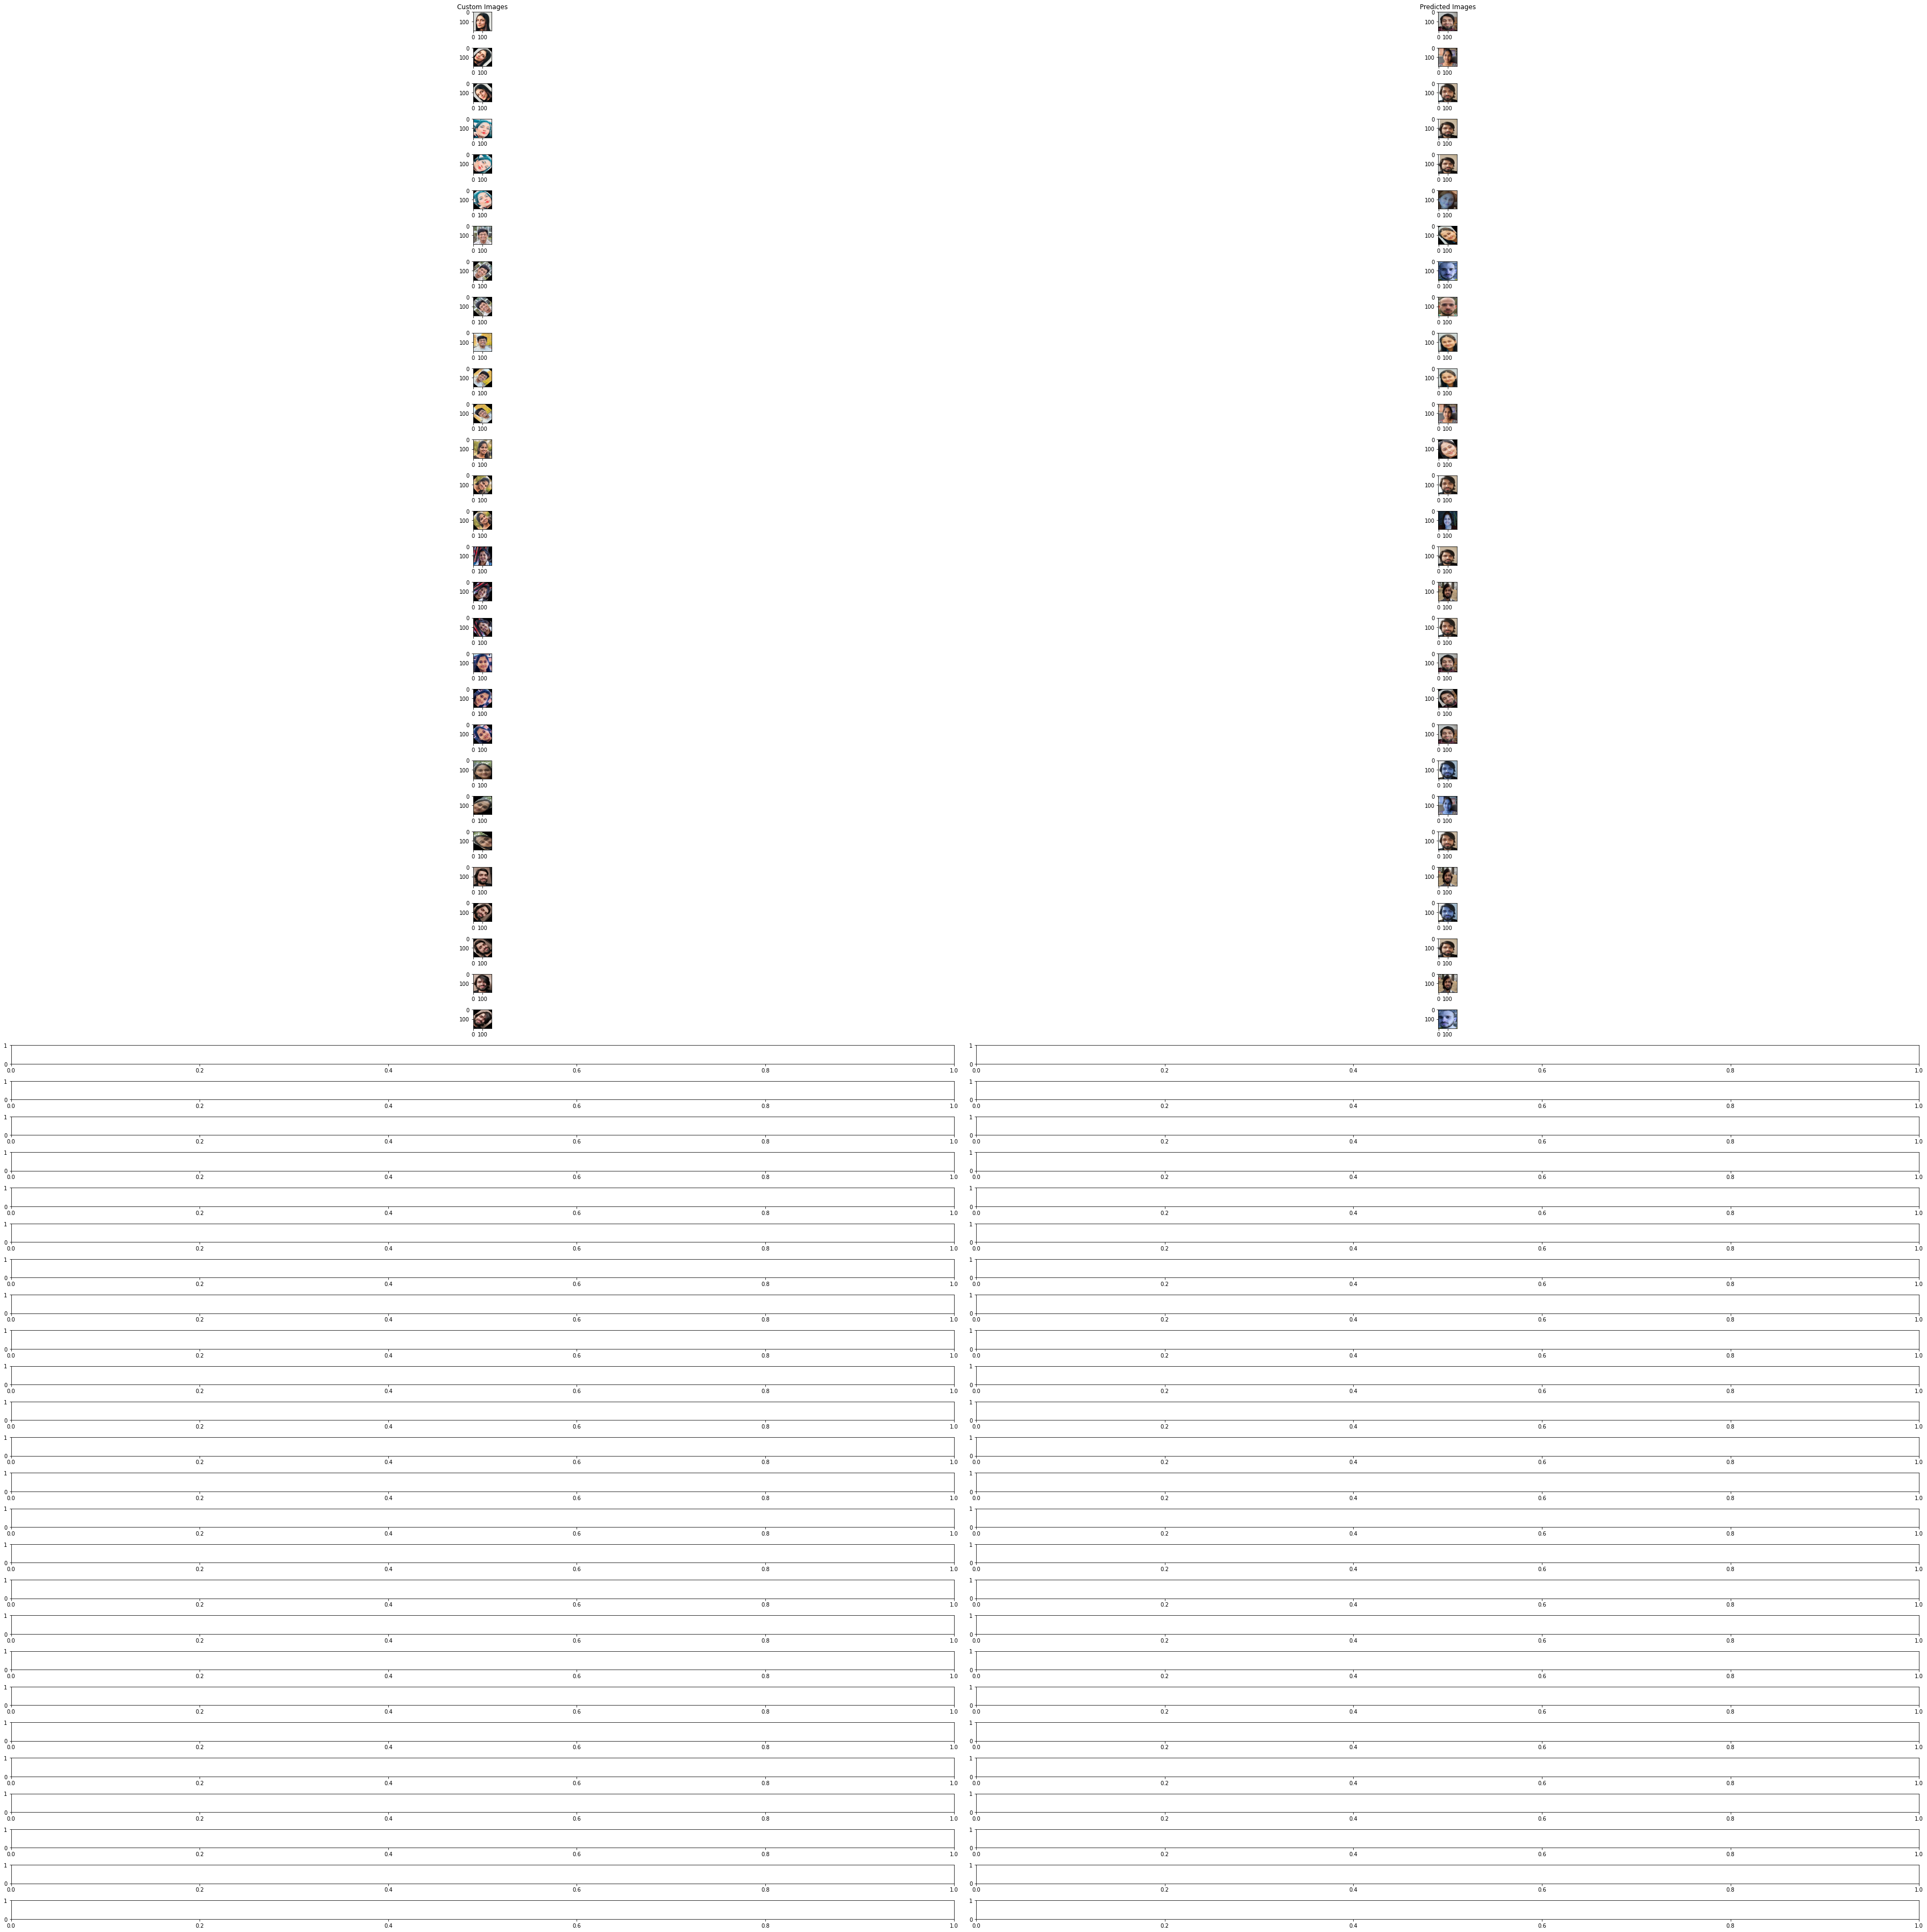

In [29]:
# Ploting the images
import numpy as np
column_names = ('Custom Images', 'Predicted Images')
fig,axes = plt.subplots(nrows = 54, ncols = 2, figsize=(50,50))

for i in range (len(list_similar_predict_image)):
  axes[i,0].imshow(list_custom_images[i])
  axes[i,1].imshow(list_similar_predict_image[i])

for ax, col in zip(axes[0], column_names):
    ax.set_title(col)

fig.tight_layout()
plt.show()
